In [30]:
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import imutils
from scipy.signal import find_peaks
plt.rcParams['figure.figsize'] = (12,9)

### Zadanie 1 Analiza obrazów
#### Part A: tekst

Wczytaj obraz przedstawiający tekst, dokonaj odwrócenia kolorów (czarne tło), a
następnie jego transformacji do domeny częstotliwościowej za pomocą DFT. Przedstaw wartości fazy i modułu współczynników Fouriera (osobno).

In [3]:
def read_img(filename):
    img = imageio.imread(filename)
    return np.array(img)[:,:,0]

def display_img(img, **kwargs):
    plt.figure(**kwargs)
    imgplot = plt.imshow(img, cmap='Greys_r')
    plt.show()

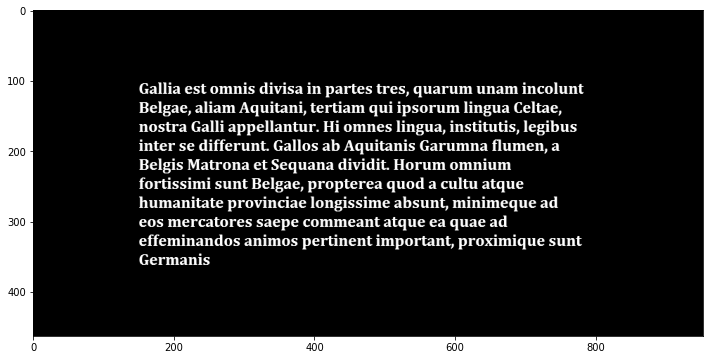

In [4]:
img = read_img('Lab9_galia.png')
img = 255 - img
display_img(img)

<AxesSubplot:>

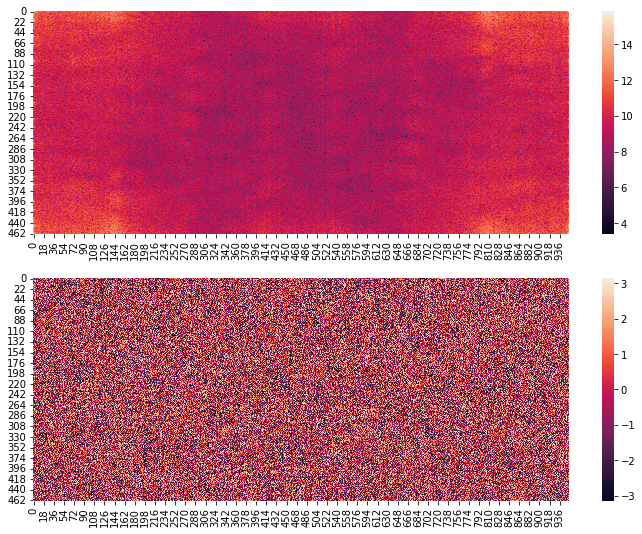

In [5]:
# fft
fft = np.fft.fft2(img)
fig, axes = plt.subplots(2, 1)
sns.heatmap(np.log(np.abs(fft)), ax=axes[0])
sns.heatmap(np.angle(fft), ax=axes[1])

Wybierz przykładowego reprezentanta grupy - wytnij z dużego zdjęcia wzorzec
obiektu np. literę e lub charakterystyczny fragment ryby z ławicy (imcrop).
Wykorzystując transformację Fouriera oblicz korelację między wybranym wzorcem,
a całym obrazem

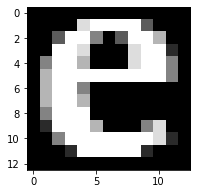

In [6]:
imp = read_img('Lab9_galia_e.png')
imp = 255 - imp
display_img(imp, figsize=(3, 3))

<AxesSubplot:>

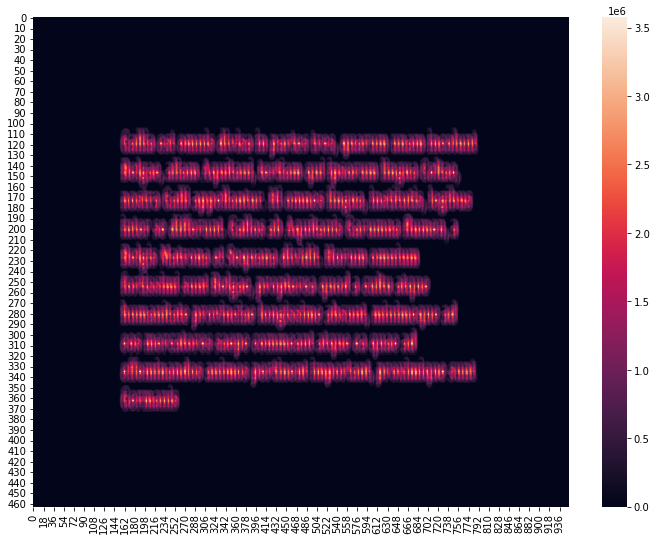

In [7]:
def get_correlations(img, p):
    fft_img = np.fft.fft2(img)
    fft_p = np.fft.fft2(np.rot90(p, 2), s=fft_img.shape)

    return  np.real(np.fft.ifft2(fft_img * fft_p))

C = get_correlations(img, imp)
sns.heatmap( C )

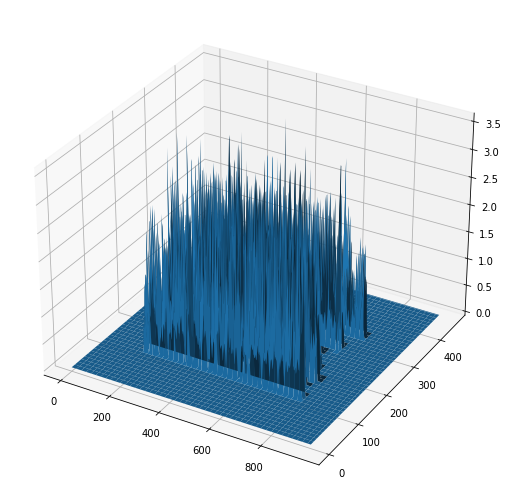

In [8]:
x = np.arange(0, C.shape[1])
y = np.arange(0, C.shape[0])
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, C)

plt.show()

In [9]:
detections = np.argwhere((C>0.999*C.max()))

In [10]:
result_img = np.array(imageio.imread('Lab9_galia.png'))
for center in detections:
    result_img = cv2.circle(result_img, center[::-1]-imp.shape[0]//2, imp.shape[0], (255,0,0), 2)

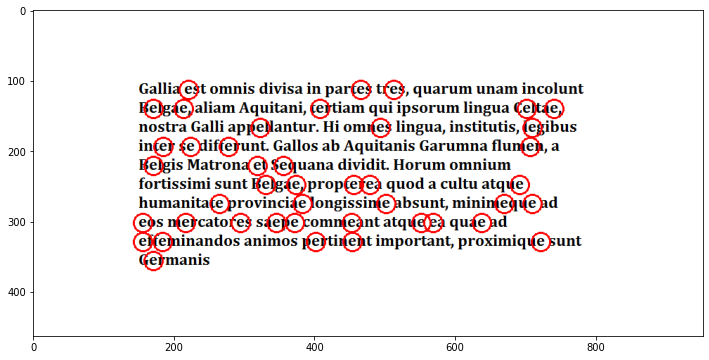

In [ ]:
plt.imshow(result_img)

#### Part B: ryby

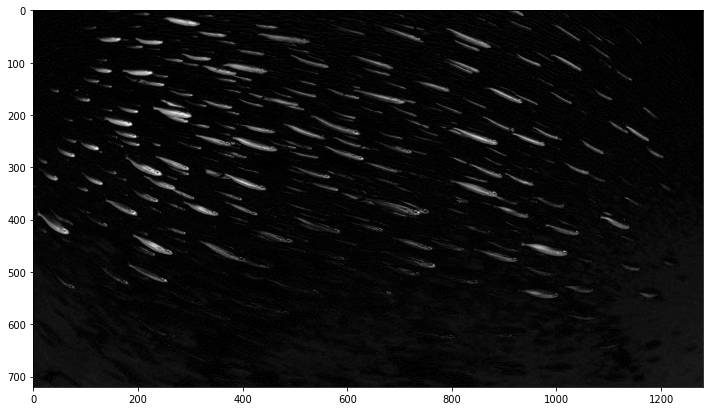

In [12]:
fish_school = read_img('Lab9_school.jpg')
display_img(fish_school)

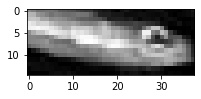

In [13]:
fish = read_img('Lab9_fish1.png')
display_img(fish, figsize=(3, 3))

In [24]:
fishes = [imutils.rotate_bound(fish, angle) for angle in np.linspace(-20, 20, 8, dtype=np.int32)]

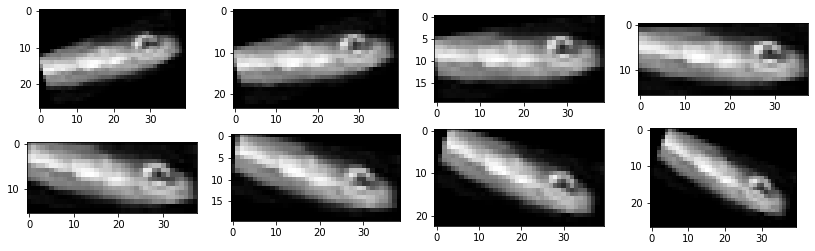

In [25]:
plt.figure(figsize=(14, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(fishes[i], cmap='Greys_r')
plt.show()

In [92]:
correlation = np.array([get_correlations(fish_school, fish) for fish in fishes]).mean(axis=0)

In [149]:
def detect_peaks(image, sigma=5, thresh=5e5):
    smoothed = scipy.ndimage.gaussian_filter(image, sigma)
    neighborhood = generate_binary_structure(2,2)
    local_max = maximum_filter(smoothed, footprint=neighborhood)==smoothed
    background = (smoothed==0)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)
    detected_peaks = (local_max ^ eroded_background) & (image>thresh)

    return np.argwhere(detected_peaks)

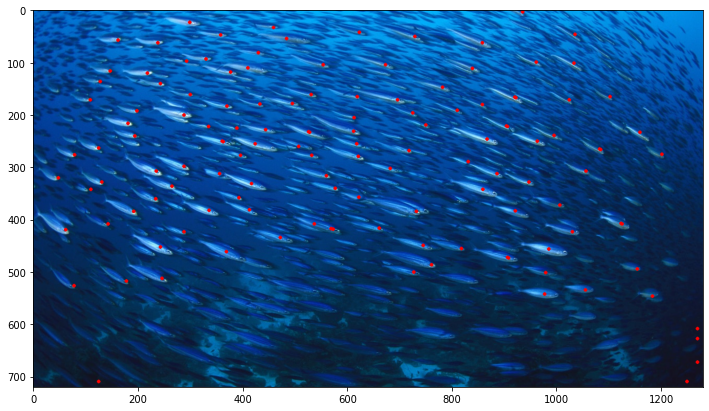

In [161]:
result_img = np.array(imageio.imread('Lab9_school.jpg'))
for center in detect_peaks(correlation, 5, 5e5):
    result_img = cv2.circle(result_img, center[::-1]-10, 2, (255,0,0), 2)
plt.imshow(result_img)